## Corona Data Analysis

### Importing necessary libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import glob

In [2]:
import os
for dirname, _, filenames in os.walk('C:\Pandas\Corona'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Pandas\Corona\corona.ipynb
C:\Pandas\Corona\corona.md
C:\Pandas\Corona\covid_19_data.csv
C:\Pandas\Corona\time_series_covid_19_confirmed.csv
C:\Pandas\Corona\time_series_covid_19_confirmed_US.csv
C:\Pandas\Corona\time_series_covid_19_deaths.csv
C:\Pandas\Corona\time_series_covid_19_deaths_US.csv
C:\Pandas\Corona\time_series_covid_19_recovered.csv


### Creating new dataFrame and reading the csv file 

In [3]:
df = pd.read_csv('covid_19_data.csv', index_col=False)

In [4]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


### Cleaning the Data 

In [5]:
df.isnull().any(axis=0)

SNo                False
ObservationDate    False
Province/State      True
Country/Region     False
Last Update        False
Confirmed          False
Deaths             False
Recovered          False
dtype: bool

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().any()

SNo                False
ObservationDate    False
Province/State     False
Country/Region     False
Last Update        False
Confirmed          False
Deaths             False
Recovered          False
dtype: bool

### Removing negative value from the confirmed column

In [8]:
df.loc[df['Confirmed'] < 0]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
147524,147525,11/02/2020,Unknown,Colombia,2021-04-02 15:13:53,-302844.0,0.0,0.0


In [9]:
df=df[~(df['Confirmed'] <  0)]

In [10]:
df.loc[df['Confirmed'] < 0]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered


In [11]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


## Which country had the maximum number of cases ?

In [12]:
df['Confirmed'] = df['Confirmed'].astype('int32')
df['Country/Region'] = df['Country/Region'].astype('string')

In [13]:
m =pd.DataFrame(df.groupby(['Country/Region']).sum()['Confirmed'])
m

,Confirmed
Country/Region,
Australia,9.447430e+06
Austria,2.000000e+00
Belgium,1.547341e+08
Brazil,2.649295e+09
Canada,1.934975e+08
Chile,2.315812e+08
China,0.000000e+00
Colombia,5.151198e+08
Denmark,2.122260e+05


### Visualizing the number of confirmed cases 

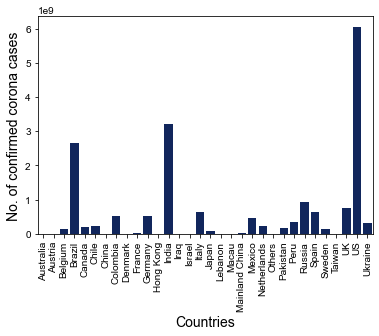

In [14]:
sns.barplot(x=m.index, y= m.Confirmed, data=pd.melt(m), color='#042069')
sns.set(rc={"figure.figsize":(10, 4)})
sns.set_theme(style='whitegrid')
plt.xticks(rotation=90)
plt.xlabel('Countries', size=14)
plt.ylabel('No. of confirmed corona cases', size=14)
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228328 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              228328 non-null  int64  
 1   ObservationDate  228328 non-null  object 
 2   Province/State   228328 non-null  object 
 3   Country/Region   228328 non-null  string 
 4   Last Update      228328 non-null  object 
 5   Confirmed        228328 non-null  int32  
 6   Deaths           228328 non-null  float64
 7   Recovered        228328 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(3), string(1)
memory usage: 14.8+ MB


## Which province in the world has max number of cases?

In [16]:
p = pd.DataFrame(df.groupby(['Province/State','Country/Region']).sum()['Confirmed'])
p.reset_index(inplace=True)
cases = p.sort_values(by='Confirmed', ascending=False).head(25)
cases 

,Province/State,Country/Region,Confirmed
90,California,US,696898013
373,Maharashtra,India,681186928
176,England,UK,666227518
643,Texas,US,552039886
583,Sao Paulo,Brazil,521308945
189,Florida,US,429469197
441,New York,US,380636880
307,Karnataka,India,282256260
266,Illinois,US,263055187
24,Andhra Pradesh,India,254740494


### Plotting the cities having higher no. of cases of corona

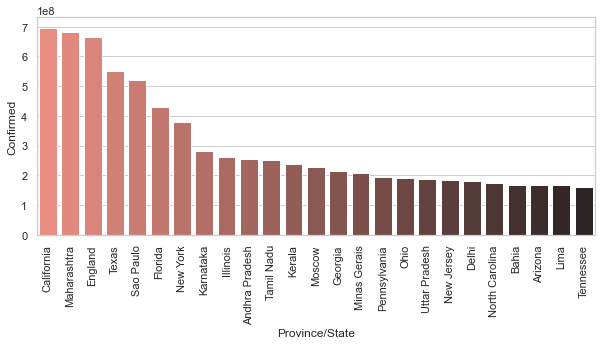

In [17]:
sns.barplot(x= cases['Province/State'] ,y= cases.Confirmed, data=pd.melt(cases), palette="dark:salmon_r")
plt.xticks(rotation=90)
sns.set(rc={"figure.figsize":(15, 4)})
sns.set_theme(style='ticks')
plt.show()

## How many total deaths have been confirmed until now?

In [18]:
death = pd.DataFrame(df.groupby(['Country/Region','Province/State']).sum()['Deaths'])
death.reset_index(inplace=True) 
death

,Country/Region,Province/State,Deaths
0,Australia,Australian Capital Territory,1257.0
1,Australia,Diamond Princess cruise ship,0.0
2,Australia,External territories,0.0
3,Australia,From Diamond Princess,0.0
4,Australia,Jervis Bay Territory,0.0
...,...,...,...
757,Ukraine,Vinnytsia Oblast,171216.0
758,Ukraine,Volyn Oblast,156312.0
759,Ukraine,Zakarpattia Oblast,230741.0
760,Ukraine,Zaporizhia Oblast,225346.0


#### Total number of deaths till now

In [19]:
df.Deaths.sum()

447832514.0

## Which country had the highest number of deaths?

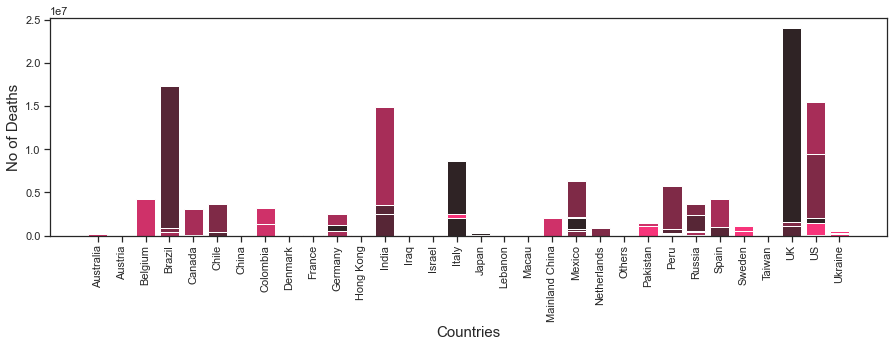

In [20]:
plt.bar(death['Country/Region'], death['Deaths'], width=0.8, color=sns.dark_palette('#f7347a'))
plt.xticks(rotation='vertical')
plt.xlabel('Countries', size=15)
plt.ylabel('No of Deaths', size=15)
plt.show()

## How much the confirmed cases of corona caused to fuel the increase in number of deaths?


In [21]:
from scipy.stats import pearsonr
#df.Confirmed.corr(df.Deaths)
pearsonr(df['Confirmed'], df['Deaths'])

(0.8811066022501558, 0.0)

#### There is high correlation between the no. of deaths and the number of confirmed cases of Corona around the world!

In [22]:
df.Confirmed.corr(df.Recovered)

0.49884042546488516

In [23]:
df.Recovered.corr(df.Deaths)

0.4215457273449939

<AxesSubplot:>

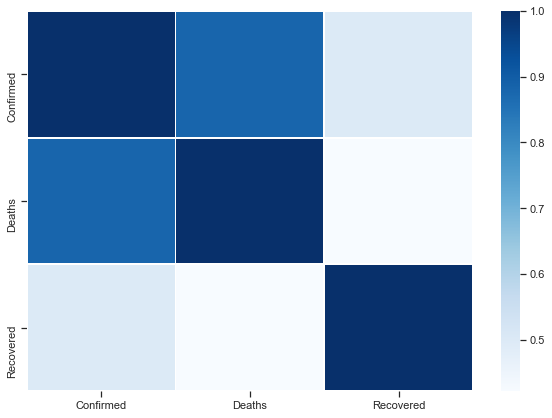

In [24]:
df.Confirmed.corr(df.Deaths)
mat = df[['Confirmed','Deaths', 'Recovered']].corr()
mat
#sns.heatmap(mat, annot=True, cmap='winter')
plt.subplots(figsize=(10,7))
sns.heatmap(mat, cmap='Blues', linecolor='white', linewidths=1)

## Which country had the best recovery rate? 

In [25]:
df['Confirmed'] = df['Confirmed'].astype('int64')
df['Recovered'] = df['Recovered'].astype('int64')
#df.astype({'Confirmed' : 'int64', 'Recovered' : 'int64','Deaths' : 'int64'})
#df = df.apply(pd.to_numeric, errors='coerce').fillna(0) # converting NaN to 0

In [26]:
rec = pd.DataFrame(df[['Recovered', 'Confirmed']].value_counts(normalize=True)*100)
rec.reset_index(inplace=True)
rec.rename(columns = {0:'Rate'}, inplace=True)
rec

,Recovered,Confirmed,Rate
0,0,0,1.296381
1,13,13,0.356943
2,0,1,0.302635
3,1,1,0.284240
4,18,18,0.231684
...,...,...,...
172495,15341,16055,0.000438
172496,15339,20059,0.000438
172497,15338,16322,0.000438
172498,15338,16243,0.000438


In [27]:
rec['Country/Region'] = df['Country/Region'].copy()
rec

,Recovered,Confirmed,Rate,Country/Region
0,0,0,1.296381,Mainland China
1,13,13,0.356943,Mainland China
2,0,1,0.302635,Mainland China
3,1,1,0.284240,Mainland China
4,18,18,0.231684,Mainland China
...,...,...,...,...
172495,15341,16055,0.000438,Canada
172496,15339,20059,0.000438,Germany
172497,15338,16322,0.000438,UK
172498,15338,16243,0.000438,Brazil


In [28]:
rec = rec.groupby('Country/Region').sum()
rec.reset_index(inplace=True)
rec[['Recovered', 'Confirmed']].value_counts(normalize=True)*100
rec

,Country/Region,Recovered,Confirmed,Rate
0,Australia,100832513,192042854,1.666900
1,Austria,0,421,0.002190
2,Belgium,5091225,6838785,0.124820
3,Brazil,324377711,592065406,2.372902
4,Canada,185747456,359137106,2.410129
5,Chile,203445530,369000983,1.487772
6,China,160207,294450,0.219859
7,Colombia,395415274,773774937,2.830139
8,Denmark,23230352,54765508,0.285992
9,France,121145228,233840331,1.346309


In [29]:

rec['Country/Region'] = rec['Country/Region'].astype('str')

### Plotting the recovery rate across all countries

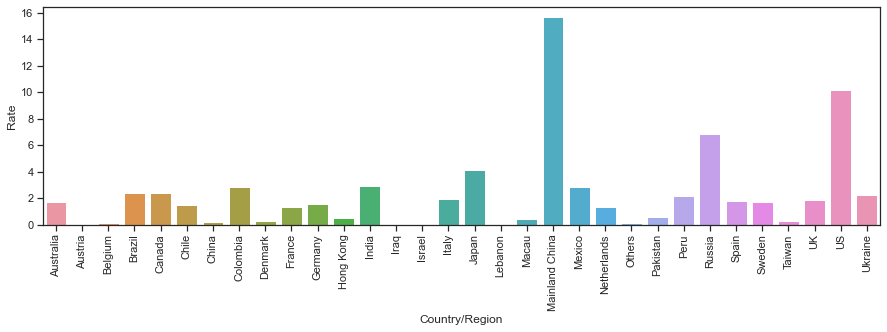

In [30]:
sns.barplot(x= rec['Country/Region'], y= rec.Rate, data=rec)
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
plt.show()

### Mainland China had the best recovery rate 

In [31]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228328 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              228328 non-null  int64  
 1   ObservationDate  228328 non-null  object 
 2   Province/State   228328 non-null  object 
 3   Country/Region   228328 non-null  string 
 4   Last Update      228328 non-null  object 
 5   Confirmed        228328 non-null  int64  
 6   Deaths           228328 non-null  float64
 7   Recovered        228328 non-null  int64  
dtypes: float64(1), int64(3), object(3), string(1)
memory usage: 78.3 MB
